In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform
import math

In [6]:
def plot_len_iat(path):
    request_lengths = []
    sent_tscs = []
    with open(path, 'r') as file:
        for line in file:     
            if line[0] == 'R':
                ls = line.split(',')
                sent_tsc = (float)(ls[0].split(':')[1])
                sent_tscs.append(sent_tsc)
                request_len = (float)(ls[1])
                request_lengths.append(request_len)   
    # print(len(request_lengths))
    req_lens = np.zeros(1500)
    for i in range(0, 1500):
        req_lens[i] = request_lengths[i]


    bins_a = np.arange(0, np.max(req_lens)+0.005, 0.005) 
    counts_a, _ = np.histogram(req_lens, bins=bins_a)
    percentage_counts_a = counts_a / 1500.0    

    inner_times = np.zeros(1499)
    for i in range(len(sent_tscs)-1):
        inner_time = sent_tscs[i+1] - sent_tscs[i]
        inner_times[i] = inner_time
        
    bins_b = np.arange(0, np.max(inner_times)+0.005, 0.005) 
    counts_b, _ = np.histogram(inner_times, bins=bins_b)
    percentage_counts_b = counts_b / 1499.0

    mean_len = np.mean(req_lens)
    std_len = np.std(req_lens)
    print("Mean of request length:", mean_len)
    print("Standard deviation of request length:", std_len)
    print()
    
    mean_iat = np.mean(inner_times)
    std_iat = np.std(inner_times)
    print("Mean of inner arrival time:", mean_iat)
    print("Standard deviation of inner arrival time:", std_iat)
    # print(np.mean(percentage_counts_b))
    

    plt.bar(bins_a[:-1], percentage_counts_a, width=0.005, align='edge', alpha=0.7, color = '#88c999')
    plt.xlabel('Request Lengths')
    plt.ylabel('Normalized Counts')
    plt.title('Distribution of Request Lengths')
    plt.xlim(0, 0.5)
    plt.show()


    plt.bar(bins_b[:-1], percentage_counts_b, width=0.005, align='edge', alpha=0.7, color = '#88c999')
    plt.xlabel('Inner-Arrival Time')
    plt.ylabel('Normalized Counts')
    plt.title('Distribution of Inner-Arrival Time')
    plt.show()

    
    return [req_lens, inner_times]

## Problem 1

#### a)

Mean of request length: 0.2
Standard deviation of request length: 0.0

Mean of inner arrival time: 0.21899655770513674

Standard deviation of inner arrival time: 0.21829130807085162

As the graph below shown, when the parameter is `-d 1`, the request length is a **deterministic distribution**. And, intuitively, its **mean** is 0.2 and **standard deviation** is 0 because it only takes only a single value.

As for IAT, it is a **exponential distribution**.

Mean of request length: 0.2
Standard deviation of request length: 0.0

Mean of inner arrival time: 0.21899655770513674
Standard deviation of inner arrival time: 0.21829130807085162


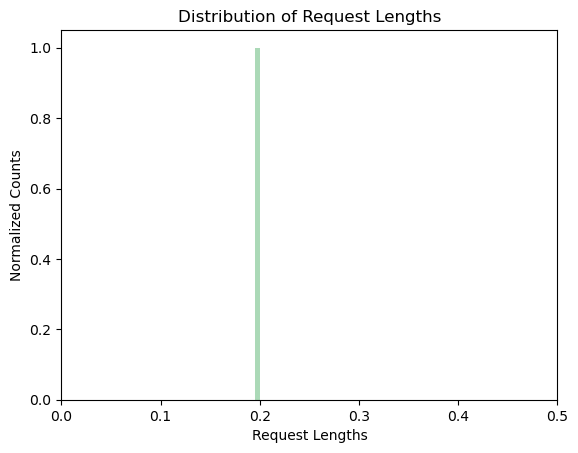

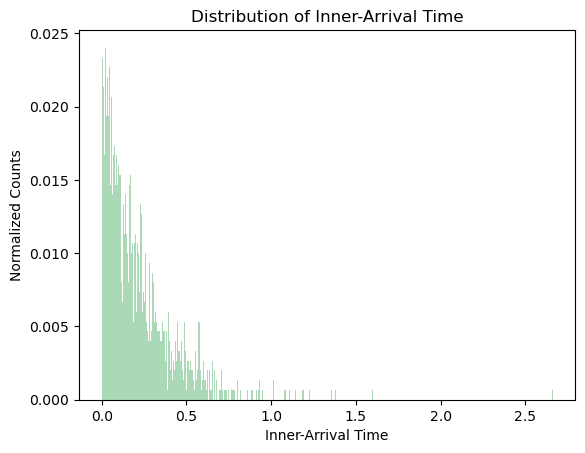

In [7]:
path = './sl1.txt'
[counts_a, counts_b] = plot_len_iat(path)

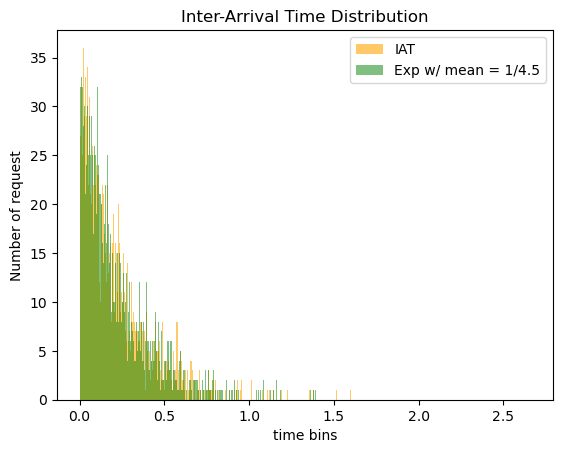

In [8]:
num=len(counts_b)
x=np.arange(0, max(counts_b)+0.005, 0.005) 
exponential_samples = np.random.exponential (1/4.5, num)
hist, _= np.histogram(counts_b, bins=x) 
histo, _ = np.histogram (exponential_samples, bins=x)
# print(histo)
# res = 0
# for i in histo:
#     res += i
# print(res)

plt.bar(x[:-1], hist, width=0.005, align='edge', color="orange", label="IAT", alpha=0.6)
plt.bar(x[:-1], histo, width=0.005, align='edge', color="green", label="Exp w/ mean = 1/4.5", alpha=0.5)
plt.title( 'Inter-Arrival Time Distribution')
plt.xlabel ("time bins")
plt.ylabel ("Number of request")
plt.legend ()
plt.show()

#### b)

Mean of request length: 0.20219557866666665
Standard deviation of request length: 0.050416546080612044

Mean of inner arrival time: 0.21938747098065384
Standard deviation of inner arrival time: 0.22219447764019817

As the graph below shown, when the parameter is `-d 2`, the request length is a normal distribution and the inner-arrival time is an exponential distribution.

Mean of request length: 0.20219557866666665
Standard deviation of request length: 0.050416546080612044

Mean of inner arrival time: 0.21938747098065384
Standard deviation of inner arrival time: 0.22219447764019817


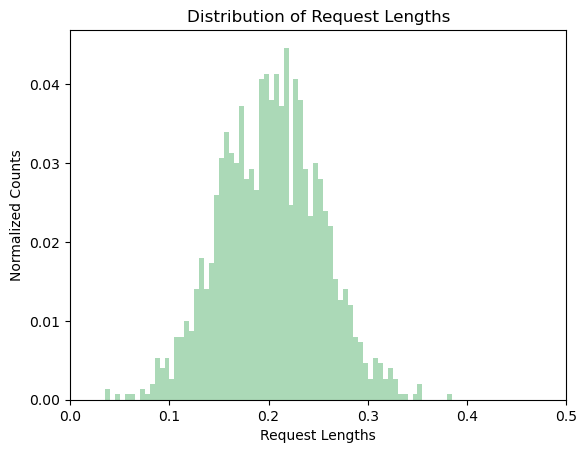

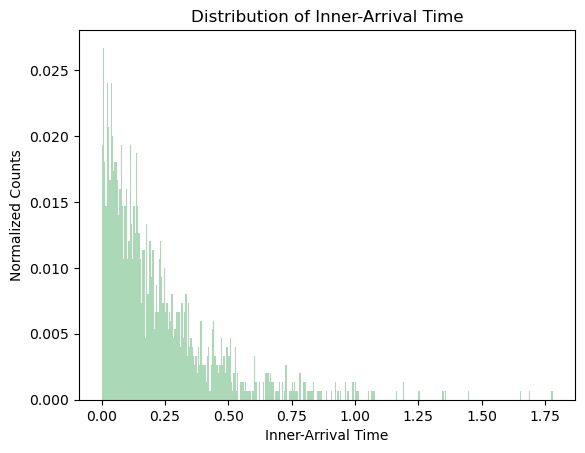

In [9]:
path2 = './sl2.txt'
[counts_a2, counts_b2] = plot_len_iat(path2)

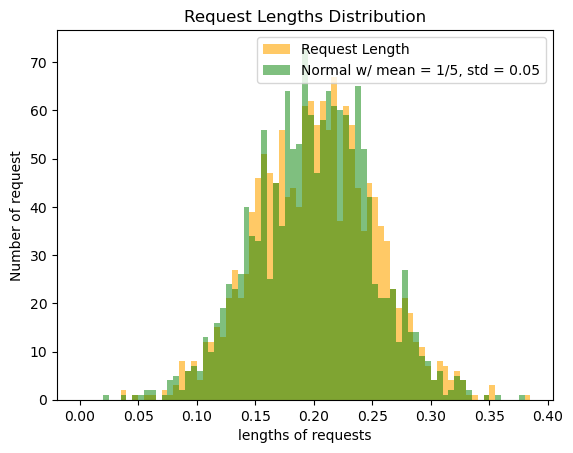

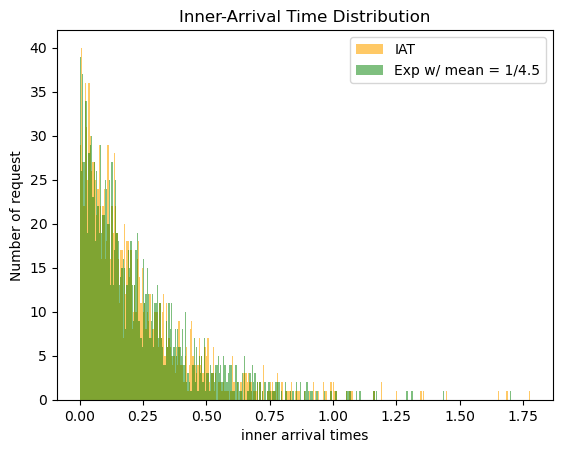

In [10]:


# sns.kdeplot(counts_a, color='red', label='Experiment')

# plt.title("Density between Different Distributions")
# plt.xlabel("Value")
# plt.ylabel("Density")
# plt.legend()
# plt.show()

num=len(counts_a2)
# print(num)
x=np.arange(0, max(counts_a2)+0.005, 0.005)
normal_samples = np.random.normal(1/5.0, 0.050416546080612044, num)
hist, _= np.histogram(counts_a2, bins=x)
histo, _ = np.histogram (normal_samples, bins=x)

plt.bar(x[:-1], hist, width=0.005, align='edge', color="orange", label="Request Length", alpha=0.6)
plt.bar(x[:-1], histo, width=0.005, align='edge', color="green", label="Normal w/ mean = 1/5, std = 0.05", alpha=0.5)
plt.title( 'Request Lengths Distribution')
plt.xlabel ("lengths of requests")
plt.ylabel ("Number of request")
plt.legend ()
plt.show()

num=len(counts_b2)
# print(num)
x=np.arange(0, max(counts_b2)+0.005, 0.005)
exponential_samples = np.random.exponential (1/4.5, num)
hist, _= np.histogram(counts_b2, bins=x)
histo, _ = np.histogram (exponential_samples, bins=x)

plt.bar(x[:-1], hist, width=0.005, align='edge', color="orange", label="IAT", alpha=0.6)
plt.bar(x[:-1], histo, width=0.005, align='edge', color="green", label="Exp w/ mean = 1/4.5", alpha=0.5)
plt.title( 'Inner-Arrival Time Distribution')
plt.xlabel ("inner arrival times")
plt.ylabel ("Number of request")
plt.legend ()
plt.show()

### c)

When the distribution of request lengths is normal distribution, for the user perspective, it has a better service quality, because it has a lower avgerage response time as utilization increases, compared to that of deterministic distribution, as the graphs below shown.

In [11]:

def get_req_ls(name, i, j):
    req_ls = []
    for index in range(i, j+1):
        path = name + (str(index) + ".txt")
        request_ls = []
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'R':
                    ls = line.split(':')[1].split(',')
                    request_ls.append(ls) 
        req_ls.append(request_ls)
    return req_ls

def compute_util(req_ls):
    res = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        total_t = (float)(request_ls[-1][-1]) - (float)(request_ls[0][-2])
        busy_t = 0
        for j in range(len(request_ls)):
            busy_t += (float)(request_ls[j][4]) - (float)(request_ls[j][3])
        utilization = busy_t / total_t
        res.append(utilization)
    return res

def compute_avg_resp(req_ls):
    res = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        sum_resp = 0
        num_resp = len(request_ls)
        avg_resp = 0
        for j in range(len(request_ls)):
            sum_resp += (float)(request_ls[j][4]) - (float)(request_ls[j][0])
        avg_resp = sum_resp / num_resp
        res.append(avg_resp)
    return res

******************** param -d 0 ********************
-d	utilization		avg response time
10	0.49230592491510017	0.09766235200001393
11	0.5414470726542508	0.10768895933332896
12	0.5905307113940111	0.11907245133332496
13	0.6395887168046623	0.13334208133334383
14	0.6885969951377872	0.15956532399999196
15	0.7375046327634063	0.19421173066665323
16	0.7865752771982701	0.23809498800001408
17	0.8355301133490362	0.2974322166666534
18	0.884366934268556	0.4035136960000115
19	0.9331885825463787	0.6222665620000092
******************** param -d 1 ********************
-d	utilization		avg response time
10	0.5072531935192245	0.07527845933332537
11	0.55794506764404	0.0807751239999931
12	0.6085584435896306	0.08713022533333575
13	0.6592004699653433	0.09472328533333015
14	0.7098490450932801	0.10460961133333573
15	0.7604574805611439	0.11791987999999826
16	0.8111089740597089	0.13880680666666922
17	0.8615462148494962	0.17899497200000042
18	0.9118366988760592	0.250691857999995
19	0.9579313260574233	0.477584362666

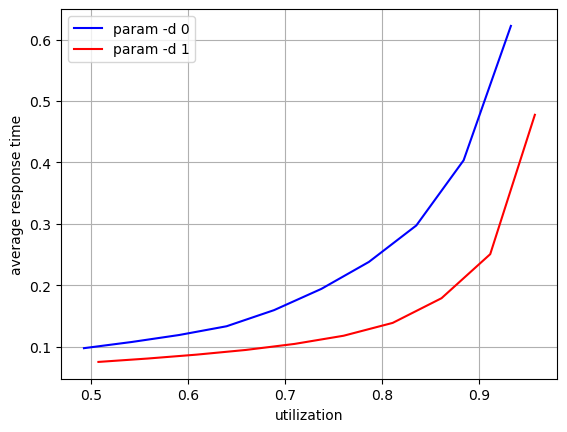

In [22]:
name0 = "./slc0"
req_ls0 = get_req_ls(name0, 10, 19)
utilization_ls0 = np.array(compute_util(req_ls0))
avg_resp_ls0 = np.array(compute_avg_resp(req_ls0))

name1 = "./slc"
req_ls1 = get_req_ls(name1, 10, 19)
utilization_ls1 = np.array(compute_util(req_ls1))
avg_resp_ls1 = np.array(compute_avg_resp(req_ls1))

print('*'*20 + ' param -d 0 ' + '*'*20)
print('-d\tutilization\t\tavg response time')
for i in range(10):
    print(f'{10+i}\t{utilization_ls0[i]}\t{avg_resp_ls0[i]}')

print('*'*20 + ' param -d 1 ' + '*'*20)
print('-d\tutilization\t\tavg response time')
for i in range(10):
    print(f'{10+i}\t{utilization_ls1[i]}\t{avg_resp_ls1[i]}')

plt.plot(utilization_ls0,avg_resp_ls0, color='blue', label='param -d 0')
plt.plot(utilization_ls1,avg_resp_ls1, color='red', label='param -d 1')
plt.xlabel('utilization')
plt.ylabel('average response time')
plt.legend()
plt.grid()
plt.show()


From the graph shown above, in both lines, as utilization increases, average response time also increase.

At lower utilizations(U<0.7), the response times of both distributions seem to be comparable. However, as utilization is larger than 0.7, `-d 1` has a better quality service than `-d 0`, because avgerage response time of `-d 1` is noticeably less than that of `-d 0` as utilization increases.

The result indicates that the system is more sensitive to traffic with an exponential IAT when it is heavily loaded.


In [35]:
def plot_irt(path):
    rej_requests = []
    with open(path, 'r') as file:
        for line in file:     
            if line[0] == 'X':
                rej_tsc = (float)(line.split(':')[1].split(',')[-1])
                rej_requests.append(rej_tsc)   
                
    # calculate reject ratio
    rej_ratio = len(rej_requests)/ 1500.0
    print("reject ratio is: ", rej_ratio)

    # plot inner-rejection time
    inner_rej_times = np.zeros(len(rej_requests)-1)
    for i in range(len(rej_requests)-1):
        inner_time = rej_requests[i+1] - rej_requests[i]
        inner_rej_times[i] = inner_time
        
    # bins_d = np.arange(0, np.max(inner_rej_times)+0.005, 0.005) 
    # counts_d, _ = np.histogram(inner_rej_times, bins=bins_d)
    # percentage_counts_d = counts_d / ((float)(len(rej_requests)-1))
    print(f'Number of rejected requests: {len(rej_requests)}')

    # plt.bar(bins_d[:-1], counts_d, width=0.005, align='edge', alpha=0.7, color = '#88c999')
    # print(inner_rej_times)
    plt.hist(inner_rej_times,bins=40)
    plt.xlabel('Inner-Rejection Time')
    plt.ylabel('Normalized Counts')
    plt.title('Distribution of Inner-Rejection Time')
    # plt.xlim(-0.1, 2)
    plt.show()

#### d)

reject ratio is:  0.035333333333333335

Number of rejected requests: 53

The distribution with param `-d 0` looks like Exponential distribution. Meanwhile, there is a peak at around 0. It implies that many rejections occur seccessively. Lastly, the number of rejections becomes sparse after the peak at around 0.

reject ratio is:  0.035333333333333335
Number of rejected requests: 53


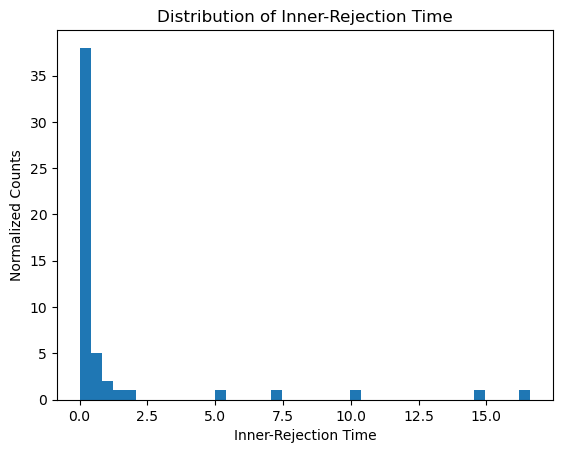

In [36]:
pathd = "./sld.txt"
plot_irt(pathd)

#### e)

reject ratio is:  0.008666666666666666

Number of rejected requests: 13

`-d 1` is better. The distribution of inner rejection time with param `-d 1` looks like Exponential distribution. It has the similar distribution pattern with that of param `-d 0`. At time 0, there is a peak, indicating that many rejections occur seccessively. The number of rejections becomes sparse after the peak at around 0. Meanwhile, the reject ratio with `-d 1` is significantly less than that with `-d 1`. 

When we compare the number of rejected requests and reject ratio with those of `-d 0`, those of `-d 1` is significantly lower, providing better service quality.


reject ratio is:  0.008666666666666666
Number of rejected requests: 13


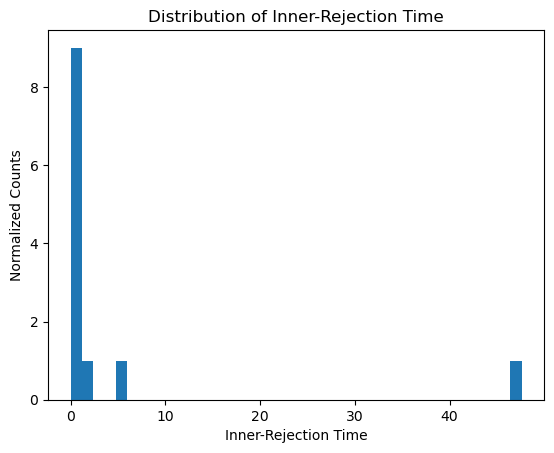

In [37]:
pathe = "./sle.txt"
plot_irt(pathe)